In [1]:
import pygmt
import matplotlib.pyplot as plt
import numpy as np
import os
from pygmt.datasets import load_earth_relief
import pandas as pd
from geopy.distance import geodesic
from geopy.distance import distance
import pyproj
geodesic = pyproj.Geod(ellps='WGS84')

# Create the first figure, which shows the regional overview. This will have the bathymetry on the subducting plate, with no topography on the overriding plate. On the landward side of the trench, show the slab2.0 depth contours

Load in the slab2.0 contours

In [2]:
slab2_cont = np.loadtxt(fname="/Users/danieldouglas/PyLith_Internship/Slab2_CAM/cam_slab2_dep_02.24.18_contours.in",
                        comments='>')

contour_lons = slab2_cont[:, 0]
contour_lats = slab2_cont[:, 1]
contour_vals = np.abs(slab2_cont[:, 2])
contour_increments = np.arange(np.min(contour_vals), 300 + 20, 20)

CAM_trench = np.loadtxt(fname="/Users/danieldouglas/PyLith_Internship/Slab2_CAM/cam_slab2_clp_02.24.18.csv",
                        delimiter=',')[0: 240]

gmtset [ERROR]: Pen name None not recognized!
gmtset [WARNING]: Representation of pen width (None) not recognized. Using default.
/Users/danieldouglas/opt/anaconda3/envs/pygmt-vtk/lib/python3.11/site-packages/pygmt/src/project.py:234: RuntimeWarning: Changing 'output_type' from 'pandas' to 'file' since 'outfile' parameter is set. Please use output_type='file' to silence this warning.
  output_type = validate_output_table_type(output_type, outfile=outfile)


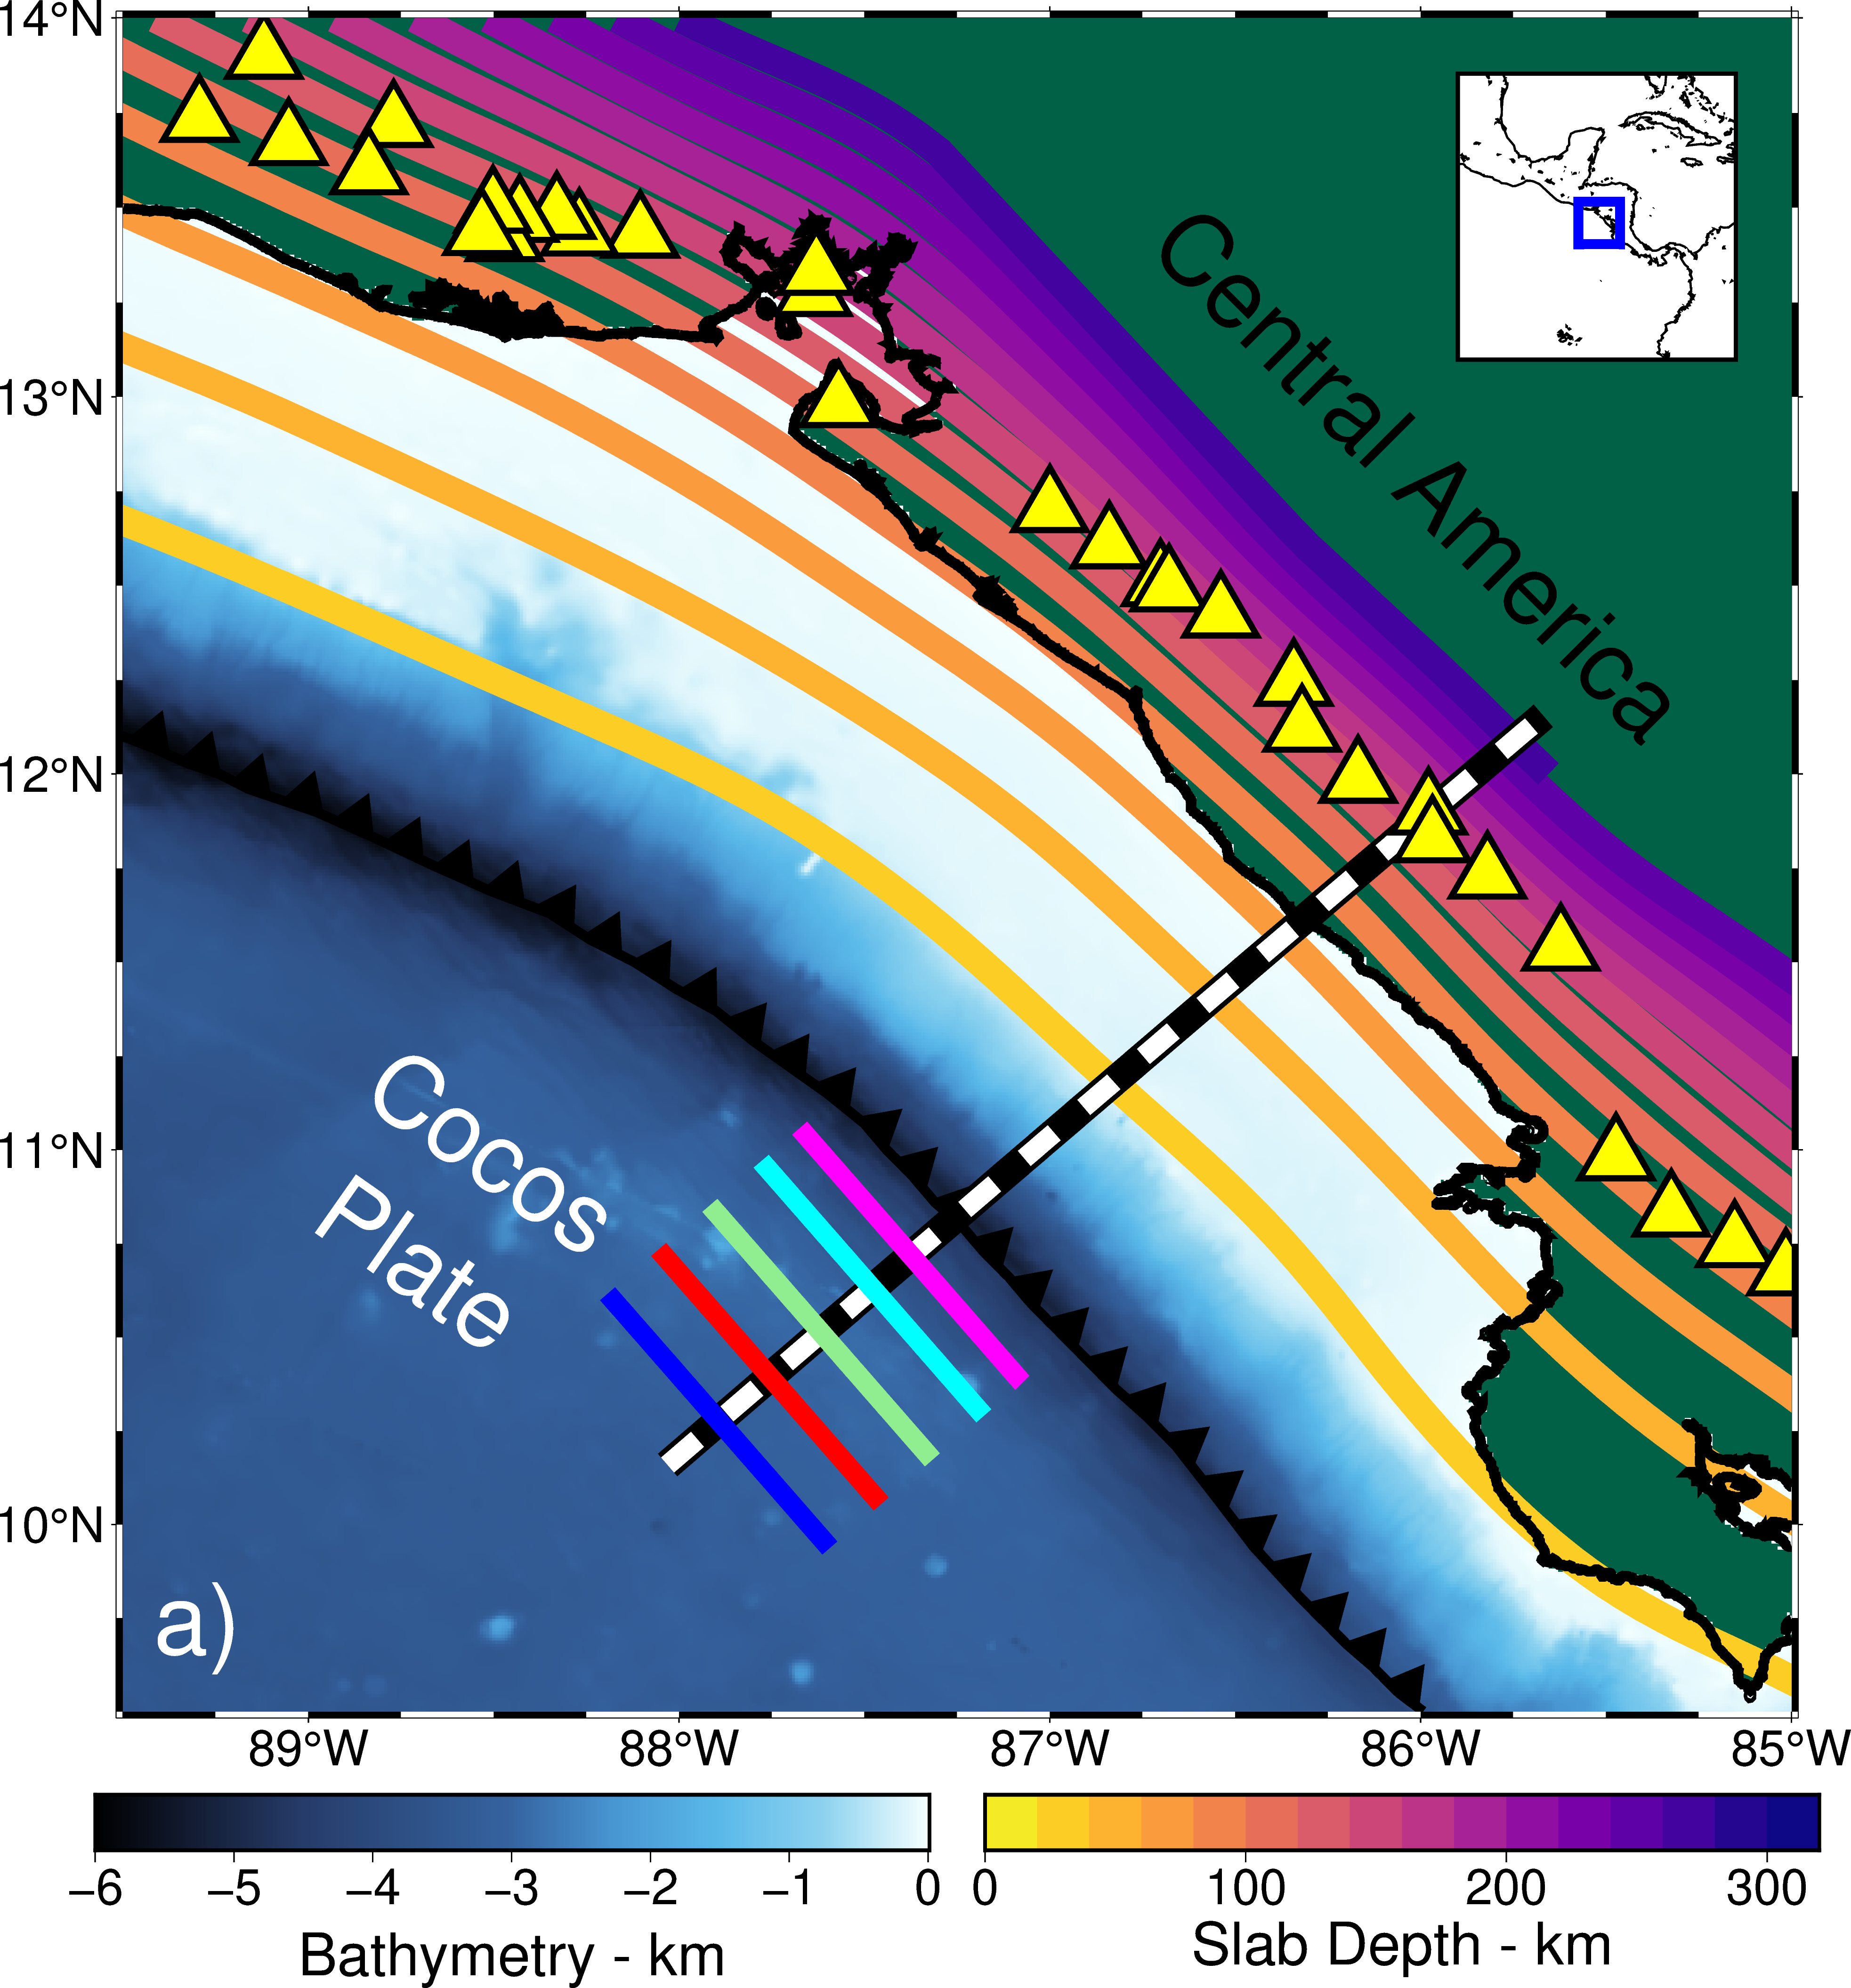

In [3]:
fig = pygmt.Figure()
pygmt.config(FONT_LABEL='30p', MAP_LABEL_OFFSET='0.5', MAP_TICK_PEN_PRIMARY=None, FONT_ANNOT_PRIMARY='25p')
region = [-89.5, -85, 9.5, 14]
inset_shift = 15
inset_region = [-87.5 - inset_shift, -87.5 + inset_shift, 12 - inset_shift, 12 + inset_shift]

grid_relief = load_earth_relief(
    resolution="30s",
    region=region,
    registration="gridline")

# Assign a value of 0 for all water masses and a value of 1 for all land
# masses.
grid = pygmt.grdlandmask(region=region, spacing="30s", maskvalues=[1, 0, 0, 0, 0], resolution="f")
fig.basemap(region=region, projection="M30c", frame=True)
pygmt.makecpt(cmap="geo",  series=[-6, 0.01, 0.01], continuous=False, reverse=False)

fig.grdimage(grid=grid*grid_relief / 1e3, cmap=True)

fig.colorbar(position="JBC+o-8c/1.5c+w15c/1c", frame=["1", "x+lBathymetry - km"])

pygmt.makecpt(cmap="plasma", series=[0, 300, 20], color_model="+c0-9", reverse=True)
for value in contour_increments:
    if value != 0:
        contour_indices = np.where(contour_vals == value)
        lons_for_current_cont = contour_lons[contour_indices]
        lats_for_current_cont = contour_lats[contour_indices]
        fig.plot(x=lons_for_current_cont[0:-3], \
                 y=lats_for_current_cont[0:-3], \
                 pen="15p,black", zvalue=np.abs(value), cmap=True)

fig.colorbar(position="JBC+o8c/1.5c+w15c/1c", frame=["100", "x+lSlab Depth - km"])

transect_coords = np.array([[-88.1 + 360, 10.1],
                            [-85.75 + 360, 12.1]])

fwd_az, back_az, dist = geodesic.inv(transect_coords[0, 0], transect_coords[0, 1], transect_coords[1, 0], transect_coords[1, 1])
spacing_of_profiles = 1.0
max_profile_length  = 350
pygmt.project(center=[transect_coords[0][0], transect_coords[0][1]], azimuth=fwd_az, outfile="profile.txt",
              generate=spacing_of_profiles, length=[10, max_profile_length], unit=True)

transect_coords = np.loadtxt(fname="profile.txt")

fig.coast(shorelines="1/5p,black", region=region)

fig.plot(x=CAM_trench[:, 0], y=CAM_trench[:, 1], pen="5p", style="f1c/0.8c+l+t+o0.5c+p", fill='black')

fig.plot(x=transect_coords[:, 0], y=transect_coords[:, 1], pen='15p,black')
fig.plot(x=transect_coords[:, 0], y=transect_coords[:, 1], pen='10p,white,20p_20p')

with fig.inset(
    position="jTR+o1c",
    box="+gwhite+p2p",
    region=inset_region,
    projection="M5c"
):
    fig.coast(shorelines="1p,black")
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data=rectangle, style="r+s", pen="5p,blue")

# List of volcanoes comes from the Smithsonian global volcanism program. This list includes all the 
# volcanoes located in El Salvador, Honduras, Nicaragua, and Costa Rica from the following link:
# https://volcano.si.edu/volcanolist_regions.cfm?RegionGroup=Middle%20America-Caribbean%20Volcanic%20Regions
# Note that these are specifically the volcanoes located under the "Central America Volcanic Arc" section.
volcanoes = np.array([
    [-87.57, 12.98],
    [-87, 12.702],
    [-86.84, 12.606],
    [-86.702, 12.506],
    [-86.6786, 12.4922],
    [-86.539, 12.423],
    [-86.342, 12.242],
    [-86.32, 12.12],
    [-86.1688, 11.9844],
    [-85.979, 11.9],
    [-85.968, 11.826],
    [-85.82, 11.73],
    [-85.622, 11.538],
    [-85.473, 10.98],
    [-85.324, 10.83],
    [-85.153, 10.748],
    [-85.015, 10.673],
    [-84.703, 10.463],
    [-87.639, 13.274],
    [-87.63, 13.33],
    [-87.983, 14.694],
    [-88.105, 13.428],
    [-88.269, 13.434],
    [-88.33, 13.478],
    [-88.43, 13.47],
    [-88.471, 13.419],
    [-88.502, 13.494],
    [-88.532, 13.435],
    [-88.77, 13.72],
    [-88.837, 13.595],
    [-89.053, 13.672],
    [-89.12, 13.9],
    [-89.25, 14.02],
    [-89.294, 13.734],
    [-89.55, 13.87],
    [-89.633, 13.813],
    [-89.63, 13.853],
    [-89.631, 14.054],
    [-89.742, 13.872]
])

volcanoes[:, 0] += 360

fig.plot(
    x=volcanoes[:, 0],
    y=volcanoes[:, 1],
    fill='yellow',
    size=1.5 + volcanoes[:, 0]*0,
    style='t',
    pen='3p,black',
    transparency=0
)

point_100_80 = transect_coords[transect_coords[:, 2] == 30]
point_80_60 = transect_coords[transect_coords[:, 2] == 50]
point_60_40 = transect_coords[transect_coords[:, 2] == 70]
point_40_20 = transect_coords[transect_coords[:, 2] == 90]
point_20_5 = transect_coords[transect_coords[:, 2] == 105]

################ CREATE PROFILE ORTHOGONAL LINES SHOWING WHERE THE DEPTH AVERAGE BINS ARE LOCATED #################
pygmt.project(center=[point_100_80[0][0], point_100_80[0][1]], azimuth=fwd_az + 90, outfile="100_80.txt",
              generate=spacing_of_profiles, length=[-50, 50], unit=True)

pygmt.project(center=[point_80_60[0][0], point_80_60[0][1]], azimuth=fwd_az + 90, outfile="80_60.txt",
              generate=spacing_of_profiles, length=[-50, 50], unit=True)

pygmt.project(center=[point_60_40[0][0], point_60_40[0][1]], azimuth=fwd_az + 90, outfile="60_40.txt",
              generate=spacing_of_profiles, length=[-50, 50], unit=True)

pygmt.project(center=[point_40_20[0][0], point_40_20[0][1]], azimuth=fwd_az + 90, outfile="40_20.txt",
              generate=spacing_of_profiles, length=[-50, 50], unit=True)

pygmt.project(center=[point_20_5[0][0], point_20_5[0][1]], azimuth=fwd_az + 90, outfile="20_5.txt",
              generate=spacing_of_profiles, length=[-50, 50], unit=True)

prof_100_80 = np.loadtxt("100_80.txt")
prof_80_60 = np.loadtxt("80_60.txt")
prof_60_40 = np.loadtxt("60_40.txt")
prof_40_20 = np.loadtxt("40_20.txt")
prof_20_5 = np.loadtxt("20_5.txt")

fig.plot(x=prof_100_80[:, 0], y=prof_100_80[:, 1], pen='10p,blue')
fig.plot(x=prof_80_60[:, 0], y=prof_80_60[:, 1], pen='10p,red')
fig.plot(x=prof_60_40[:, 0], y=prof_60_40[:, 1], pen='10p,lightgreen')
fig.plot(x=prof_40_20[:, 0], y=prof_40_20[:, 1], pen='10p,cyan')
fig.plot(x=prof_20_5[:, 0], y=prof_20_5[:, 1], pen='10p,magenta')

fig.text(x=-89.3, y=9.75, text="a)", font="50p,white")

fig.text(x=-88.5, y=11, text="Cocos", font="50p,white", angle=-35)
fig.text(x=-88.7, y=10.7, text="Plate", font="50p,white", angle=-35)
fig.text(x=-86, y=12.8, text="Central America", font="50p,black", angle=-45)

fig.show()
fig.savefig("regional_map.png")

# Create panel b which will show the depth-averaged porosity from Naif

In [4]:
porosity = pd.read_excel('../porosity_SERPENT_outerrise.xlsx', header=None).to_numpy()
resistivity = pd.read_excel('../resistivity_SERPENT_outerrise.xlsx', header=None).to_numpy()

trench_distance = np.flip(np.arange(0, 100.1, 0.1))
depth_resistivity = np.arange(0, 12.75, 0.05)
depth_porosity = np.arange(0, 10., 0.05)

X_POR, Z_POR = np.meshgrid(trench_distance, depth_porosity)
X_RES, Z_RES = np.meshgrid(trench_distance, depth_resistivity)

# We do not include the sediment layer in our model. Set the resistivity of the sediments 
# in the Naif dataset to NAN's so that it doesn't impact our comparison. They define the
# sediment layer as being below a resistivity of 3.5 ohm meter. This occurs at roughly a
# depth of 500 m.
# basement_resistivity = 3.5
# resistivity[resistivity <= 3.5] = np.nan
X_POR = X_POR[10:, :]
Z_POR = Z_POR[10:, :] - 0.5
porosity = porosity[10:, :]

X_POR = X_POR[:, 0:-50]
Z_POR = Z_POR[:, 0:-50]
porosity = porosity[:, 0:-50]

X_RES = X_RES[10:, :]
Z_RES = Z_RES[10:, :] - 0.5
resistivity = resistivity[10:, :]

X_RES = X_RES[:, 0:-50]
Z_RES = Z_RES[:, 0:-50]
resistivity = resistivity[:, 0:-50]

In [5]:
def depth_average_porosity(base_x, bin_sizes, X_POR, Z_POR, POROSITY):
    '''
    base_x = the initial value to start binning the data (double)
    bin_sizes = an array of doubles that specifies the width of the bins. The first bin will start
                at base_x, and the subsequent bins will be shifted by the size of the previous bins.
    X_POR  = uniform mesh that specifies the x-values of the grid
    Z_POR  = uniform mesh that specifies the z-values of the grid
    POROSITY = uniform mesh that specifies the porosity values on the grid

    Returns:
    An array (object) that contains the depth averaged porosity within each bin, and an array that
    specifies the depths of the depth averaging.
    '''
    # Create an array to store the depth averages. There must be the same
    # number of depth averaged curves as there are the number of bins.
    depth_averaged_por = np.zeros(len(bin_sizes), dtype=object)
    z_vals_for_bins = np.unique(Z_POR.flatten())
    
    for i in range(len(bin_sizes)):
        average_por_at_z_vals = np.zeros(len(z_vals_for_bins))
        for j in range(len(z_vals_for_bins)):
    
            por_indices = np.where( (X_POR.flatten() >= base_x) & (X_POR.flatten() <= base_x + bin_sizes[i]) & (Z_POR.flatten() == z_vals_for_bins[j]) )
            por_at_current_z = POROSITY.flatten()[por_indices]
            average_por_at_z_vals[j] = np.average(por_at_current_z)
    
        depth_averaged_por[i] = average_por_at_z_vals
        base_x += bin_sizes[i]

    return z_vals_for_bins, depth_averaged_por

In [6]:
base_x = 5
bin_sizes = np.array([15, 20, 20, 20, 20])
z_vals_for_bins, depth_averaged_por = depth_average_porosity(base_x, bin_sizes, X_POR, Z_POR, porosity)

gmtset [ERROR]: Pen name None not recognized!
gmtset [WARNING]: Representation of pen width (None) not recognized. Using default.


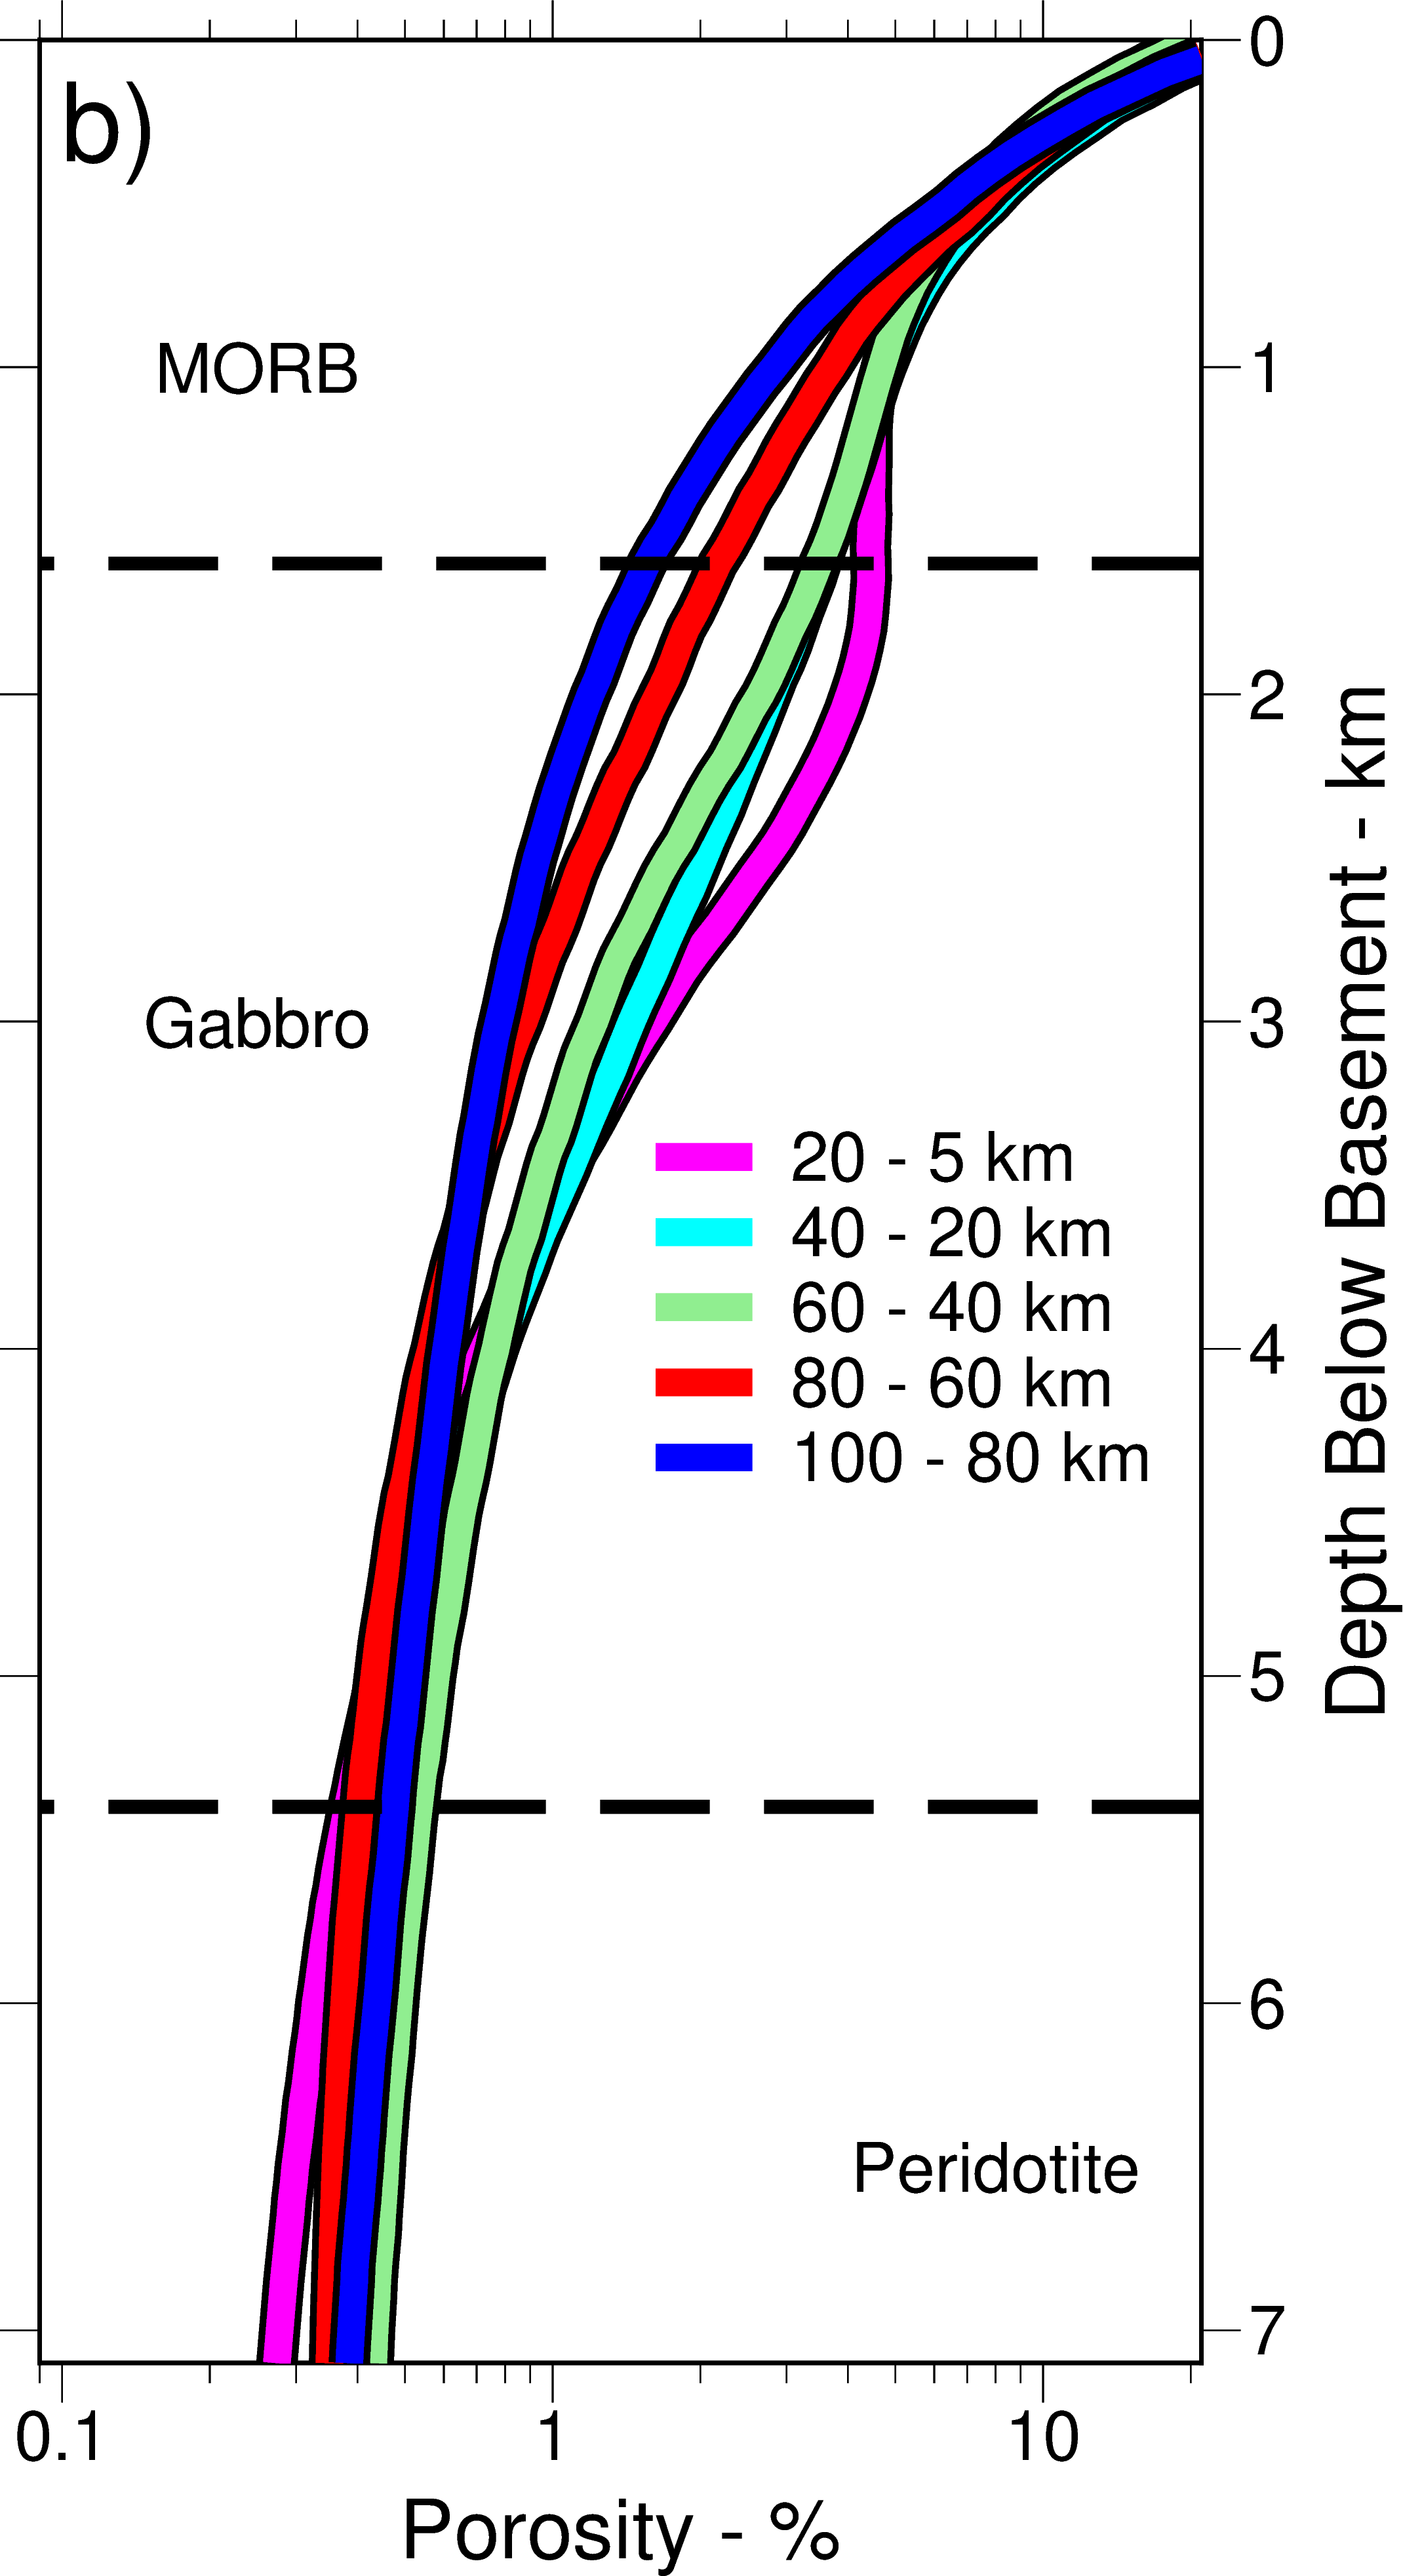

In [7]:
fig = pygmt.Figure()
pygmt.config(FONT_LABEL='30p', MAP_LABEL_OFFSET='0.5', MAP_TICK_PEN_PRIMARY=None, FONT_ANNOT_PRIMARY='25p',
             MAP_TICK_LENGTH_PRIMARY='0.5', MAP_TICK_LENGTH_SECONDARY='0', MAP_FRAME_WIDTH='0.5')
             
# Define region of interest
region = [0.09, 21, 0, 7.1]

# Plot clipped grid
fig.basemap(region=region, projection="X15cl/-30c", frame=["wSnE", "xa1f3+lPorosity - %", "ya1+lDepth Below Basement - km"])


fig.plot(x=depth_averaged_por[0] * 100, y=z_vals_for_bins, pen="15p,black")
fig.plot(x=depth_averaged_por[0] * 100, y=z_vals_for_bins, pen="10p,magenta", label="20 - 5 km")

fig.plot(x=depth_averaged_por[1] * 100, y=z_vals_for_bins, pen="15p,black")
fig.plot(x=depth_averaged_por[1] * 100, y=z_vals_for_bins, pen="10p,cyan", label="40 - 20 km")

fig.plot(x=depth_averaged_por[2] * 100, y=z_vals_for_bins, pen="15p,black")
fig.plot(x=depth_averaged_por[2] * 100, y=z_vals_for_bins, pen="10p,lightgreen", label="60 - 40 km")

fig.plot(x=depth_averaged_por[3] * 100, y=z_vals_for_bins, pen="15p,black")
fig.plot(x=depth_averaged_por[3] * 100, y=z_vals_for_bins, pen="10p,red", label="80 - 60 km")

fig.plot(x=depth_averaged_por[4] * 100, y=z_vals_for_bins, pen="15p,black")
fig.plot(x=depth_averaged_por[4] * 100, y=z_vals_for_bins, pen="10p,blue", label="100 - 80 km")

fig.plot(x=np.array([0.0001, 100]), y=np.array([1.6, 1.6]), pen="5p,black,-")
fig.plot(x=np.array([0.0001, 100]), y=np.array([5.4, 5.4]), pen="5p,black,-")

fig.text(x=0.25, y=1.0, text="MORB")
fig.text(x=0.25, y=3.0, text="Gabbro")
fig.text(x=8, y=6.5, text="Peridotite")

fig.legend(position="JMR+jTR+o0.5c/-1.2c", box=False)

fig.text(x=0.125, y=0.25, text="b)", font="40p")

fig.show()
fig.savefig("depth_averaged_porosity.png")